# 1. Import images

In [8]:
import scipy.io
data = scipy.io.loadmat('data/ex3data1.mat')

# A 5000x400matrix, each row representing a 20x20 pixel image
X = data['X']

# A 5000-dimensional matrix, each element representing the number shown in the corresponding image
Y = data['y'].reshape(5000)

# 2. Display selection of images

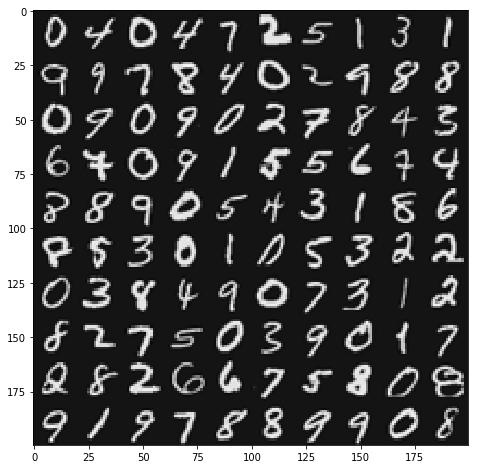

In [23]:
import numpy as np
import random
from matplotlib import pyplot as plt

# Generating new random numbers each time I executed the kernel meant that
# a new image had to be generated, so I wrote a script to generate a
# hundred random numbers between 0 and 4999 and copied the output here
rand_nums = np.array([457, 4925, 31, 3479, 4392, 4110, 107, 4292, 1345, 4614,
              2150, 4885, 4793, 3883, 4483, 2977, 1859, 1417, 4038, 957,
              430, 3598, 300, 431, 4691, 1799, 4190, 3643, 1084, 4735,
              2327, 4340, 4743, 4754, 277, 244, 2213, 2740, 3237, 3709,
              3976, 2278, 87, 539, 2720, 683, 4561, 481, 3181, 4488, 1201,
              47, 1028, 2608, 2036, 92, 332, 1804, 3586, 4337, 2778, 1057,
              3827, 2949, 1906, 2751, 3865, 4615, 2612, 4600, 503, 4705,
              4014, 3409, 618, 1735, 1587, 1, 4115, 4910, 1780, 4219, 2058,
              3611, 4372, 1424, 996, 821, 289, 492, 954, 4034, 1789, 2137,
              3246, 1474, 1038, 3524, 4456, 4093])

img_arr = np.empty([20, 220])
for j in range(0, 10):
    img_row = np.empty([20, 20])
    for i in range(0, 10):
        img = X[rand_nums[(10*j) + i]].reshape(20, 20)
        img_row = np.concatenate((img_row, img), axis=1)
    img_arr = np.concatenate((img_arr, img_row), axis=0)

plt.figure(figsize=(12,8))
plt.imshow(img_arr[20:, 20: ].T, interpolation="nearest", cmap='gray')

# Show random selection of 100 images using imshow
plt.show()